In [1]:
import sys
import matplotlib.pyplot as plt
# import seaborn as sns
import numpy as np
from scipy import stats, integrate
import matplotlib.ticker as tk
import matplotlib as mpl
import os

sys.path.append('/home/jtb34/GitHub/GACF/')
from NGTS.NGTS_Field import return_field_from_object_directory, NGTSField
from NGTS.GACF_utils import TIME_CONVERSIONS
from NGTS import NGTSObject

from ngtsio import ngtsio

In [2]:
FIELDNAME = 'NG0442-3345' 
# field = NGTSField(fieldname=FIELDNAME, test='CYCLE1802')

In [ ]:
objs = field.object_list

In [ ]:
# get magnitudes of objects (NGTS mag, not Gaia mag)
print len(objs)
objs = objs[::100]
print len(objs)
print objs

In [3]:
def inject_sine(obj, period, amplitude, phase=0, use_binned=True, inplace=False):
    flux = obj.flux_binned if use_binned else obj.flux
    flux = np.array(flux)
    timeseries = obj.timeseries_binned if use_binned else obj.timeseries
    timeseries = np.array(timeseries)
    
    sin_data = amplitude * np.sin((timeseries * (np.pi * 2 / period)) + phase)
    
    flux = flux + sin_data
    
    if inplace:
        sin_obj = obj
    else:
        from copy import deepcopy
        sin_obj = deepcopy(obj)
    
    if use_binned:
        sin_obj.flux_binned = flux
    else:
        sin_obj.flux = flux
        
    return sin_obj

In [ ]:
obj = NGTSObject(field=FIELDNAME, obj=11489, test='CYCLE1802')
obj.get_binned_data(delete_unbinned=False)

In [ ]:
obj.plot_data(interactive=True, use_binned_data=True)

In [ ]:
dic = ngtsio.get(fieldname=FIELDNAME, ngts_version='CYCLE1802', obj_id=1085, keys=['HJD', 'SYSREM_FLUX3', "FLAGS", "FLUX3"])

In [ ]:
dic.keys()

In [ ]:
flux = dic['SYSREM_FLUX3'][np.where(dic['FLAGS'] == 0)]
flux2 = dic['FLUX3'][np.where(dic['FLAGS'] == 0)]
timeseries = dic['HJD'][np.where(dic['FLAGS'] == 0)]
med = np.nanmedian(flux)
sig = np.nanstd(flux)
# idx_ok = np.where(abs(flux - med) < (3.0 * sig))
# flux = flux[idx_ok]
# timeseries = timeseries[idx_ok]
# print med, sig

In [ ]:
plt.scatter((timeseries - timeseries[0]) / 86400., flux, s=0.1)
plt.ylim([-100, 100])
plt.show()

In [ ]:
plt.scatter((timeseries - timeseries[0]) / 86400., flux2, s=0.1)
plt.ylim([-100, 100])
plt.show()

In [ ]:
obj.get_binned_data()
obj.plot_data(interactive=True)

In [4]:
def extract_period(obj):
    obj.calculate_periods_from_autocorrelation()
#     obj.plot_data_autocol_ft(interactive=True)
    return obj.periods[0] if len(obj.periods) > 0 else None

In [5]:
def inject_sin_and_return_period(obj, period, amplitude, phase=0, use_binned=True):
    sin_obj = inject_sine(obj, period, amplitude, phase, use_binned, inplace=False)
    return extract_period(sin_obj)

In [6]:
def is_period_detected(period, base_value, expected_period, rtol=0.01):
    near_base = np.isclose(period, base_value, rtol=rtol)
    near_expected = np.isclose(period, expected_period, rtol=rtol)
    if near_expected and not near_base:
        return True
    else:
        return False

In [ ]:
amplitude_range = [0.0, 0.001, 0.01, 0.1, 0.5, 1.0, 10.0]
period_range = [0.1, 0.5, 1.0, 2.0, 5.0, 10.0, 20.0, 30.0, 50.0, 80.0, 100.0]

outputted_periods = {}
for p in period_range:
    outputted_periods[p] = []
    for amp in amplitude_range:
        outputted_periods[p].append(inject_sin_and_return_period(obj, period=p, amplitude=amp))
print outputted_periods

In [ ]:
outputted_periods = {0.5: [13.7898187090595, 13.7898187090595, 13.7898187090595, 13.7898187090595, 0.499981730971748, 0.499981730971748, 0.499981730971748], 1.0: [13.7898187090595, 13.7898187090595, 13.7898187090595, 13.7898187090595, 13.7898187090595, 85.49687599616891, 85.49687599616891], 2.0: [13.7898187090595, 13.7898187090595, 13.7898187090595, 13.7898187090595, 2.0069689200978615, 2.0069689200978615, 1.9975905606581519], 100.0: [13.7898187090595, 13.7898187090595, 13.7898187090595, 14.249479332694818, 30.53459857006032, None, None], 5.0: [13.7898187090595, 13.7898187090595, 13.7898187090595, 13.7898187090595, 4.970748604428425, 4.970748604428425, 4.970748604428425], 0.1: [13.7898187090595, 13.7898187090595, 13.7898187090595, 13.7898187090595, 0.9606390561367293, 0.9606390561367293, 0.9606390561367293], 10.0: [13.7898187090595, 13.7898187090595, 13.7898187090595, 9.94149720885685, 9.94149720885685, 9.94149720885685, 9.94149720885685], 80.0: [13.7898187090595, 13.7898187090595, 13.7898187090595, 85.49687599616891, 85.49687599616891, 85.49687599616891, 71.24739666347408], 50.0: [13.7898187090595, 13.7898187090595, 13.7898187090595, 13.7898187090595, 47.49826444231606, 47.49826444231606, 47.49826444231606], 20.0: [13.7898187090595, 13.7898187090595, 13.7898187090595, 20.35639904670688, 20.35639904670688, 20.35639904670688, 20.35639904670688], 30.0: [13.7898187090595, 13.7898187090595, 13.7898187090595, 14.249479332694818, 30.53459857006032, 30.53459857006032, 30.53459857006032]}

In [ ]:
# print amplitude_range
fig, ax = plt.subplots(figsize=(15,15))

for key, value in outputted_periods.iteritems():
    ax.scatter(amplitude_range, [float(v) if v is not None else np.nan for v in value], s=10)
    ax.axhline(y=float(key), lw=0.1, c='r')
    
ax.set_xlabel('Injected Amplitude')
ax.set_ylabel('Outputted Period (lines indicate inputted periods)')
ax.set_xscale("symlog", linthreshx=0.001)
ax.set_yscale('log')
plt.show()
#     print '{}: {}\n'.format(key, value)

In [ ]:
for key, value in outputted_periods.iteritems():
    value = [v if v is not None else np.nan for v in value]
    base_value = value[0]
    outputted_value = value[-1]
    outputted_periods[key] = {'value': value, 
                              'threshold': [is_period_detected(v, base_value, outputted_value) for v in value]}

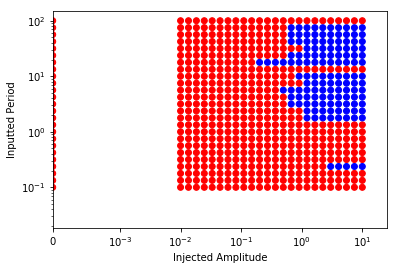

In [36]:
fig, ax = plt.subplots()

for key, value in outputted_periods.iteritems():
    ax.scatter(amplitude_range, np.linspace(key, key, len(amplitude_range)), c=value['threshold'], 
               cmap='bwr_r')
ax.set_xlabel('Injected Amplitude')
ax.set_ylabel('Inputted Period')
ax.set_xscale("symlog", linthreshx=0.001)
ax.set_yscale('log')
ax.set_xlim(left=0)
plt.show()

In [ ]:
thresholds = [(k, np.where(value['threshold'])[0][0]) for k, value in outputted_periods.iteritems() if any(value['threshold'])]
boundary = np.array(amplitude_range)[np.fromiter((t[1] for t in thresholds if t is not None), dtype=int)]
print thresholds
print boundary

In [ ]:
fig, ax = plt.subplots()

sortedplot = sorted(zip(boundary, [t[0] for t in thresholds]), key=lambda x: x[1])
boundary, thresholds = zip(*sortedplot)

ax.plot(boundary, thresholds )
ax.set_xlabel('Injected Amplitude')
ax.set_ylabel('Inputted Period')
ax.set_xscale("symlog", linthreshx=0.001)
ax.set_yscale('log')
ax.set_xlim(left=0)
plt.show()

In [12]:
# wrap up into one function per object id

def generate_thresholds(obj_id, fieldname, test, period_range, amplitude_range):
    obj = NGTSObject(field=fieldname, obj=obj_id, test=test)
    obj.get_binned_data(delete_unbinned=True)
    
    # key is expected period, values are actual outputs
    # note currently using near to last value and not close to first value
    outputted_periods = {}
    for p in period_range:
        outputted_periods[p] = []
        for amp in amplitude_range:
            outputted_periods[p].append(inject_sin_and_return_period(obj, period=p, amplitude=amp))
            
    for key, value in outputted_periods.iteritems():
        p_output = [v if v is not None else np.nan for v in value]
        base_value = p_output[0]
        outputted_value = key
        outputted_periods[key] = {'p_output': p_output, 
                                  'threshold': [is_period_detected(v, base_value, outputted_value, 
                                                                   rtol=0.1) if v is not None else False for v in value]}
        
    p_thresholds = [(k, np.where(value['threshold'])[0][0]) for k, value in outputted_periods.iteritems() if any(value['threshold'])]
    p_boundary = np.array(amplitude_range)[np.fromiter((t[1] for t in p_thresholds if t is not None), dtype=int)]
    
    periods_with_data = [t[0] for t in p_thresholds]
    new_data_t = []
    new_data_b = []
    for period in period_range:
        if period not in periods_with_data:
            new_data_t.append((period, np.nan))
            new_data_b.append(np.nan)
    p_thresholds = list(p_thresholds) + new_data_t
    p_boundary = list(p_boundary) + new_data_b  

    sortedplot = sorted(zip(p_boundary, [t[0] for t in p_thresholds]), key=lambda x: x[1])
    p_boundary, amp_thresholds = zip(*sortedplot)
    
    return p_boundary, amp_thresholds, outputted_periods

In [33]:
# period_range = [0.1, 0.5, 1.0, 5.0, 10.0, 20.0, 30.0, 50.0, 80.0, 100.0]
period_range = np.logspace(base=10, start=-1, stop=2, num=25)
# period_range = [100]
# amplitude_range = [0, 0.01, 0.1, 0.5, 1.0, 10.0]
amplitude_range = np.append(0, np.logspace(base=10, start=-2, stop=1, num=24))
print period_range
print amplitude_range

[  0.1          0.13335214   0.17782794   0.23713737   0.31622777
   0.4216965    0.56234133   0.74989421   1.           1.33352143
   1.77827941   2.37137371   3.16227766   4.21696503   5.62341325
   7.49894209  10.          13.33521432  17.7827941   23.71373706
  31.6227766   42.16965034  56.23413252  74.98942093 100.        ]
[ 0.          0.01        0.01350314  0.01823348  0.02462092  0.03324598
  0.04489251  0.06061899  0.08185467  0.11052951  0.14924955  0.20153377
  0.27213388  0.36746619  0.49619476  0.67001875  0.90473572  1.22167735
  1.64964807  2.22754295  3.00788252  4.06158599  5.48441658  7.40568469
 10.        ]


In [34]:
p_boundary, amp_thresholds, outputted_periods = generate_thresholds(obj_id=1085, fieldname=FIELDNAME, test='CYCLE1802',
                                                 period_range=period_range, amplitude_range=amplitude_range)

Calculating correlations: 100%|█████████▉| 2255/2256.0 [00:01<00:00, 1360.65it/s]
Calculating correlations: 100%|█████████▉| 2255/2256.0 [00:01<00:00, 1359.44it/s]
Calculating correlations: 100%|█████████▉| 2255/2256.0 [00:01<00:00, 1316.15it/s]
Calculating correlations: 100%|█████████▉| 2255/2256.0 [00:01<00:00, 1357.33it/s]
Calculating correlations: 100%|█████████▉| 2255/2256.0 [00:01<00:00, 1345.59it/s]
Calculating correlations: 100%|█████████▉| 2255/2256.0 [00:01<00:00, 1357.38it/s]
Calculating correlations: 100%|█████████▉| 2255/2256.0 [00:01<00:00, 1356.88it/s]
Calculating correlations: 100%|█████████▉| 2255/2256.0 [00:01<00:00, 1360.09it/s]
Calculating correlations: 100%|█████████▉| 2255/2256.0 [00:01<00:00, 1354.49it/s]
Calculating correlations: 100%|█████████▉| 2255/2256.0 [00:01<00:00, 1358.43it/s]
Calculating correlations: 100%|█████████▉| 2255/2256.0 [00:01<00:00, 1352.12it/s]
Calculating correlations: 100%|█████████▉| 2255/2256.0 [00:01<00:00, 1317.59it/s]
Calculating corr

Calculating correlations: 100%|█████████▉| 2255/2256.0 [00:01<00:00, 1360.83it/s]
Calculating correlations: 100%|█████████▉| 2255/2256.0 [00:01<00:00, 1360.86it/s]
Calculating correlations: 100%|█████████▉| 2255/2256.0 [00:01<00:00, 1360.53it/s]
Calculating correlations: 100%|█████████▉| 2255/2256.0 [00:01<00:00, 1360.14it/s]
Calculating correlations: 100%|█████████▉| 2255/2256.0 [00:01<00:00, 1358.82it/s]
Calculating correlations: 100%|█████████▉| 2255/2256.0 [00:01<00:00, 1359.45it/s]
Calculating correlations: 100%|█████████▉| 2255/2256.0 [00:01<00:00, 1360.44it/s]
Calculating correlations: 100%|█████████▉| 2255/2256.0 [00:01<00:00, 1359.93it/s]
Calculating correlations: 100%|█████████▉| 2255/2256.0 [00:01<00:00, 1360.26it/s]
Calculating correlations: 100%|█████████▉| 2255/2256.0 [00:01<00:00, 1360.87it/s]
Calculating correlations: 100%|█████████▉| 2255/2256.0 [00:01<00:00, 1360.07it/s]
Calculating correlations: 100%|█████████▉| 2255/2256.0 [00:01<00:00, 1360.69it/s]
Calculating corr

Calculating correlations: 100%|█████████▉| 2255/2256.0 [00:01<00:00, 1299.94it/s]
Calculating correlations: 100%|█████████▉| 2255/2256.0 [00:01<00:00, 1339.61it/s]
Calculating correlations: 100%|█████████▉| 2255/2256.0 [00:01<00:00, 1341.90it/s]
Calculating correlations: 100%|█████████▉| 2255/2256.0 [00:01<00:00, 1326.79it/s]
Calculating correlations: 100%|█████████▉| 2255/2256.0 [00:01<00:00, 1337.04it/s]
Calculating correlations: 100%|█████████▉| 2255/2256.0 [00:01<00:00, 1334.72it/s]
Calculating correlations: 100%|█████████▉| 2255/2256.0 [00:01<00:00, 1300.49it/s]
Calculating correlations: 100%|█████████▉| 2255/2256.0 [00:01<00:00, 1326.15it/s]
Calculating correlations: 100%|█████████▉| 2255/2256.0 [00:01<00:00, 1325.53it/s]
Calculating correlations: 100%|█████████▉| 2255/2256.0 [00:01<00:00, 1355.13it/s]
Calculating correlations: 100%|█████████▉| 2255/2256.0 [00:01<00:00, 1350.30it/s]
Calculating correlations: 100%|█████████▉| 2255/2256.0 [00:01<00:00, 1359.01it/s]
Calculating corr

Calculating correlations: 100%|█████████▉| 2255/2256.0 [00:01<00:00, 1270.20it/s]
Calculating correlations: 100%|█████████▉| 2255/2256.0 [00:01<00:00, 1243.14it/s]
Calculating correlations: 100%|█████████▉| 2255/2256.0 [00:01<00:00, 1279.95it/s]
Calculating correlations: 100%|█████████▉| 2255/2256.0 [00:01<00:00, 1266.51it/s]
Calculating correlations: 100%|█████████▉| 2255/2256.0 [00:01<00:00, 1272.35it/s]
Calculating correlations: 100%|█████████▉| 2255/2256.0 [00:01<00:00, 1242.24it/s]
Calculating correlations: 100%|█████████▉| 2255/2256.0 [00:01<00:00, 1238.93it/s]
Calculating correlations: 100%|█████████▉| 2255/2256.0 [00:01<00:00, 1236.99it/s]
Calculating correlations: 100%|█████████▉| 2255/2256.0 [00:01<00:00, 1265.83it/s]
Calculating correlations: 100%|█████████▉| 2255/2256.0 [00:01<00:00, 1277.02it/s]
Calculating correlations: 100%|█████████▉| 2255/2256.0 [00:01<00:00, 1262.30it/s]
Calculating correlations: 100%|█████████▉| 2255/2256.0 [00:01<00:00, 1267.18it/s]
Calculating corr

Calculating correlations: 100%|█████████▉| 2255/2256.0 [00:01<00:00, 1361.17it/s]
Calculating correlations: 100%|█████████▉| 2255/2256.0 [00:01<00:00, 1347.94it/s]
Calculating correlations: 100%|█████████▉| 2255/2256.0 [00:01<00:00, 1307.46it/s]
Calculating correlations: 100%|█████████▉| 2255/2256.0 [00:01<00:00, 1350.39it/s]
Calculating correlations: 100%|█████████▉| 2255/2256.0 [00:01<00:00, 1300.68it/s]
Calculating correlations: 100%|█████████▉| 2255/2256.0 [00:01<00:00, 1345.32it/s]
Calculating correlations: 100%|█████████▉| 2255/2256.0 [00:01<00:00, 1318.83it/s]
Calculating correlations: 100%|█████████▉| 2255/2256.0 [00:01<00:00, 1333.46it/s]
Calculating correlations: 100%|█████████▉| 2255/2256.0 [00:01<00:00, 1210.75it/s]
Calculating correlations: 100%|█████████▉| 2255/2256.0 [00:01<00:00, 1227.97it/s]
Calculating correlations: 100%|█████████▉| 2255/2256.0 [00:01<00:00, 1161.55it/s]
Calculating correlations: 100%|█████████▉| 2255/2256.0 [00:03<00:00, 669.59it/s]
Calculating corre

Calculating correlations: 100%|█████████▉| 2255/2256.0 [00:03<00:00, 640.38it/s]
Calculating correlations: 100%|█████████▉| 2255/2256.0 [00:03<00:00, 597.86it/s]
Calculating correlations: 100%|█████████▉| 2255/2256.0 [00:02<00:00, 769.90it/s]
Calculating correlations: 100%|█████████▉| 2255/2256.0 [00:03<00:00, 715.39it/s]
Calculating correlations: 100%|█████████▉| 2255/2256.0 [00:02<00:00, 752.02it/s]
Calculating correlations: 100%|█████████▉| 2255/2256.0 [00:03<00:00, 642.12it/s]
Calculating correlations: 100%|█████████▉| 2255/2256.0 [00:03<00:00, 590.35it/s]
Calculating correlations: 100%|█████████▉| 2255/2256.0 [00:03<00:00, 735.65it/s]
Calculating correlations: 100%|█████████▉| 2255/2256.0 [00:03<00:00, 641.69it/s]
Calculating correlations: 100%|█████████▉| 2255/2256.0 [00:03<00:00, 718.73it/s]
Calculating correlations: 100%|█████████▉| 2255/2256.0 [00:02<00:00, 752.54it/s]
Calculating correlations: 100%|█████████▉| 2255/2256.0 [00:03<00:00, 709.17it/s]
Calculating correlations: 10

Calculating correlations: 100%|█████████▉| 2255/2256.0 [00:03<00:00, 697.27it/s]
Calculating correlations: 100%|█████████▉| 2255/2256.0 [00:02<00:00, 754.05it/s]
Calculating correlations: 100%|█████████▉| 2255/2256.0 [00:03<00:00, 589.45it/s]
Calculating correlations: 100%|█████████▉| 2255/2256.0 [00:02<00:00, 758.14it/s]
Calculating correlations: 100%|█████████▉| 2255/2256.0 [00:03<00:00, 603.12it/s]
Calculating correlations: 100%|█████████▉| 2255/2256.0 [00:02<00:00, 767.26it/s]
Calculating correlations: 100%|█████████▉| 2255/2256.0 [00:03<00:00, 596.65it/s]
Calculating correlations: 100%|█████████▉| 2255/2256.0 [00:03<00:00, 649.39it/s]
Calculating correlations: 100%|█████████▉| 2255/2256.0 [00:03<00:00, 718.47it/s]
Calculating correlations: 100%|█████████▉| 2255/2256.0 [00:03<00:00, 684.15it/s]
Calculating correlations: 100%|█████████▉| 2255/2256.0 [00:04<00:00, 520.82it/s]
Calculating correlations: 100%|█████████▉| 2255/2256.0 [00:03<00:00, 668.65it/s]
Calculating correlations: 10

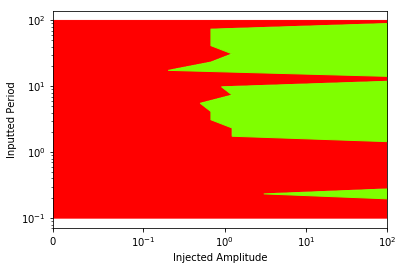

In [35]:
p_boundary_nan = [p if np.isfinite(p) else 1000. for p in p_boundary]
fig, ax = plt.subplots()
# ax.plot(p_boundary, amp_thresholds )
# ax.plot(p_boundary_nan, amp_thresholds)
ax.fill_betweenx(amp_thresholds, p_boundary_nan, np.zeros(len(p_boundary_nan)), color='r')
ax.fill_betweenx(amp_thresholds, p_boundary_nan, np.ones(len(p_boundary_nan))*1000, color='chartreuse')
ax.set_xlabel('Injected Amplitude')
ax.set_ylabel('Inputted Period')
ax.set_xscale("symlog", linthreshx=0.1)
ax.set_yscale('log')
ax.set_xlim(left=0, right=100)
plt.show()

In [18]:
outputted_periods

{0.1: {'p_output': [14.249755828621344,
   14.249755828621344,
   14.249755828621344,
   14.249755828621344,
   14.249755828621344,
   1.8037665605849804],
  'threshold': [False, False, False, False, False, False]},
 0.5: {'p_output': [14.249755828621344,
   14.249755828621344,
   14.249755828621344,
   14.249755828621344,
   14.249755828621344,
   0.499991432583205],
  'threshold': [False, False, False, False, False, True]},
 1.0: {'p_output': [14.249755828621344,
   14.249755828621344,
   14.249755828621344,
   14.249755828621344,
   14.249755828621344,
   85.49853497172806],
  'threshold': [False, False, False, False, False, False]},
 5.0: {'p_output': [14.249755828621344,
   14.249755828621344,
   14.249755828621344,
   14.249755828621344,
   4.9708450564958175,
   4.9708450564958175],
  'threshold': [False, False, False, False, True, True]},
 10.0: {'p_output': [14.249755828621344,
   14.249755828621344,
   14.249755828621344,
   14.249755828621344,
   10.178397020443818,
   9.941

In [ ]:
obj_id=1085
fieldname=FIELDNAME
test='CYCLE1802'
obj = NGTSObject(field=fieldname, obj=obj_id, test=test)
obj.get_binned_data(delete_unbinned=True)
    
# key is expected period, values are actual outputs
# note currently using near to last value and not close to first value
outputted_periods = {}
for p in period_range:
    outputted_periods[p] = []
    for amp in amplitude_range:
        outputted_periods[p].append(inject_sin_and_return_period(obj, period=p, amplitude=amp))

for key, value in outputted_periods.iteritems():
    p_output = [v if v is not None else np.nan for v in value]
    base_value = p_output[0]
    outputted_value = p_output[-1]
    outputted_periods[key] = {'p_output': p_output, 
                              'threshold': [is_period_detected(v, base_value, outputted_value) for v in value]}

In [ ]:
p_thresholds = [(k, np.where(value['threshold'])[0][0]) for k, value in outputted_periods.iteritems() if any(value['threshold'])]
p_boundary = np.array(amplitude_range)[np.fromiter((t[1] for t in p_thresholds if t is not None), dtype=int)]

periods_with_data = [t[0] for t in p_thresholds]
new_data_t = []
new_data_b = []
for period in period_range:
    if period not in periods_with_data:
        new_data_t.append((period, np.nan))
        new_data_b.append(np.nan)
p_thresholds = list(p_thresholds) + new_data_t
p_boundary = list(p_boundary) + new_data_b        

In [ ]:
p_boundary

In [ ]:
sortedplot = sorted(zip(p_boundary, [t[0] for t in p_thresholds]), key=lambda x: x[1])
p_boundary, amp_thresholds = zip(*sortedplot)

In [ ]:
periods_with_data

In [37]:
outputted_periods

{0.1: {'p_output': [14.249755828621344,
   14.249755828621344,
   14.249755828621344,
   14.249755828621344,
   14.249755828621344,
   14.249755828621344,
   14.249755828621344,
   14.249755828621344,
   14.249755828621344,
   14.249755828621344,
   14.249755828621344,
   14.249755828621344,
   14.249755828621344,
   14.249755828621344,
   14.249755828621344,
   14.249755828621344,
   14.249755828621344,
   14.249755828621344,
   14.249755828621344,
   1.8037665605849804,
   1.8037665605849804,
   1.8037665605849804,
   1.8037665605849804,
   1.8037665605849804,
   1.8037665605849804],
  'threshold': [False,
   False,
   False,
   False,
   False,
   False,
   False,
   False,
   False,
   False,
   False,
   False,
   False,
   False,
   False,
   False,
   False,
   False,
   False,
   False,
   False,
   False,
   False,
   False,
   False]},
 0.1333521432163324: {'p_output': [14.249755828621344,
   14.249755828621344,
   14.249755828621344,
   14.249755828621344,
   14.249755828621